<a href="https://colab.research.google.com/github/sseyler0119/Data-Science-Projects/blob/master/Insurance_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read in the dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/sseyler0119/datasets/master/insuranceData.csv')

In [3]:
insurance.head() # examine our data, smoker is categorical

,age,bmi,children,smoker,charges
0,19,27.900,0,yes,16884.92400
1,18,33.770,1,no,1725.55230
2,28,33.000,3,no,4449.46200
3,33,22.705,0,no,21984.47061
4,32,28.880,0,no,3866.85520


In [4]:
X = insurance.iloc[:, :-1].values # feature columns: age, bmi, number of children, smoker
y = insurance.iloc[:, 4].values # charges column

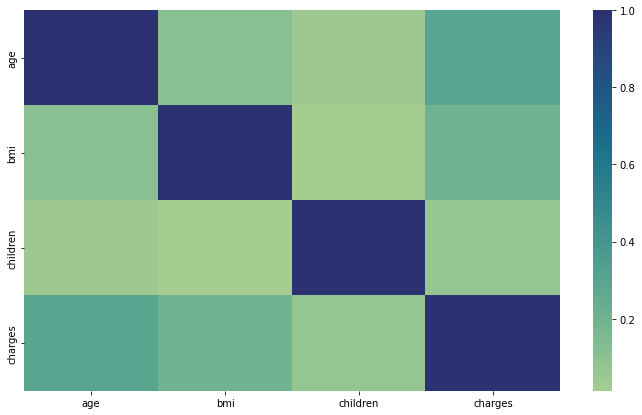

In [9]:
plt.figure(figsize=(12,7))
sns.heatmap(insurance.corr(), cmap="crest") # view correlation matrix

In [10]:
# apply LabelEncoder to smoker column (categorical data)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # import libraries
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3]) # change smoker column to numerical data
# apply OneHotEncoder to categorical data
ohc = ColumnTransformer([("smoker", OneHotEncoder(), [3])], remainder="passthrough")
X = ohc.fit_transform(X)

In [11]:
# remove extra column created by OneHotEncoder
X = X[:, 1:]

In [13]:
# split data into training and testing sets, set test size to 15%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [14]:
# fit multiple linear regresion to training set
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(X_train, y_train)

LinearRegression()

In [15]:
# predict the test results
y_pred = linearReg.predict(X_test)
y_pred

array([ 8615.73147936,  6958.23658379, 37016.44885615,  9481.03276047,
       26894.37590769, 10941.57830752,   154.65937972, 16746.30881445,
         843.03119736, 11194.98200196, 28649.70057741,  9289.41941078,
        5423.78570656, 38501.33439008, 40420.50395093, 37257.22004244,
       15201.90612152, 36101.15289021,  9362.3778767 , 31548.56275883,
        4277.50559508, 10446.83380855,  2652.21681395,  6412.35768831,
       11274.81120985, 12487.54559166, 14816.32875482,  6008.35933784,
        9587.84833762,  2309.4868235 ,  9469.19791586, 12997.85269617,
        4588.83112144,  3479.47004647,  4772.52577285, 12400.99484251,
        2330.35557981,  9167.23496332, 33443.68139763, 32784.07253631,
        4203.9676991 ,  4158.63336564, 14420.92962471, 11502.50317362,
        8840.83450608, 12573.04838453,  5044.8225515 ,  3555.44590317,
       35699.35600635,  9156.29798647, 15977.5528571 ,  2489.97034891,
       12035.04454062,  1037.7438814 , 13562.60552742, 12114.25602157,
      

In [16]:
# calculate the coefficient
print(linearReg.coef_)

[23760.70223894   260.37552844   316.74793078   424.37943211]


In [17]:
# calculate the intercept
print(linearReg.intercept_)

-11924.055322322132


In [18]:
# calculate the r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7936773121565154